# Reading in Climate Data + Plotting a Basic Time Series
### **Authors**

Fletcher Hozven fhozven@ucsb.edu

Samantha Stevenson sstevenson@ucsb.edu


### **Table of Contents**

[Goals](#purpose)

[Download and Import Needed Packages](#import)

[Locate the Downloaded Climate File](#locate)

[Open the NetCDF File](#open)

[Print and Analyze the Data](#print)

[Convert the Time Variable to DateTime Format](#time)

[Choose the Variable From Our Data](#variable)

[Plot!](#Plot)

<a id='purpose'></a> 
## **Goals**

This tutorial provides instructions on how to read in data from a netCDF file located on your local machine into Jupyter Notebook, average all data in the file over the latitude and longitude dimensions, and create a simple time series plot of the data. _note: this is for demonstration only, and is technically not the scientifically correct way to do this; see our tutorial ["Weight Grid Cells"](https://github.com/climate-datalab/Getting-Started-Tutorials/blob/main/5.%20Weight%20Grid%20Cells%20%2B%20Plot%20Global%20Average.ipynb) for more details!_

The steps below assume _you have_ Jupyter Notebook and conda already installed on your machine, and have the data file you'd like to plot downloaded in the form of a netCDF file on your machine as well. If you need more information on how to do those things, check out our other tutorials:
- [Installing Jupyter Notebook/Conda]()
- [Data Download: Web](https://climate-datalab.org/data-download-from-web/) 

**What is a time series plot?**

A time series plot is a type of graph that visually displays data points collected over a period of time, where the x-axis represents time and the y-axis represents the measured variable, allowing you to identify trends and patterns in data as it changes over time. A time series is a way to plot data points against time to see how a variable evolves over a specific period. 

Here is an example of a time series plot, showing global surface temperature _anomaly_ (difference from the average over a reference period):

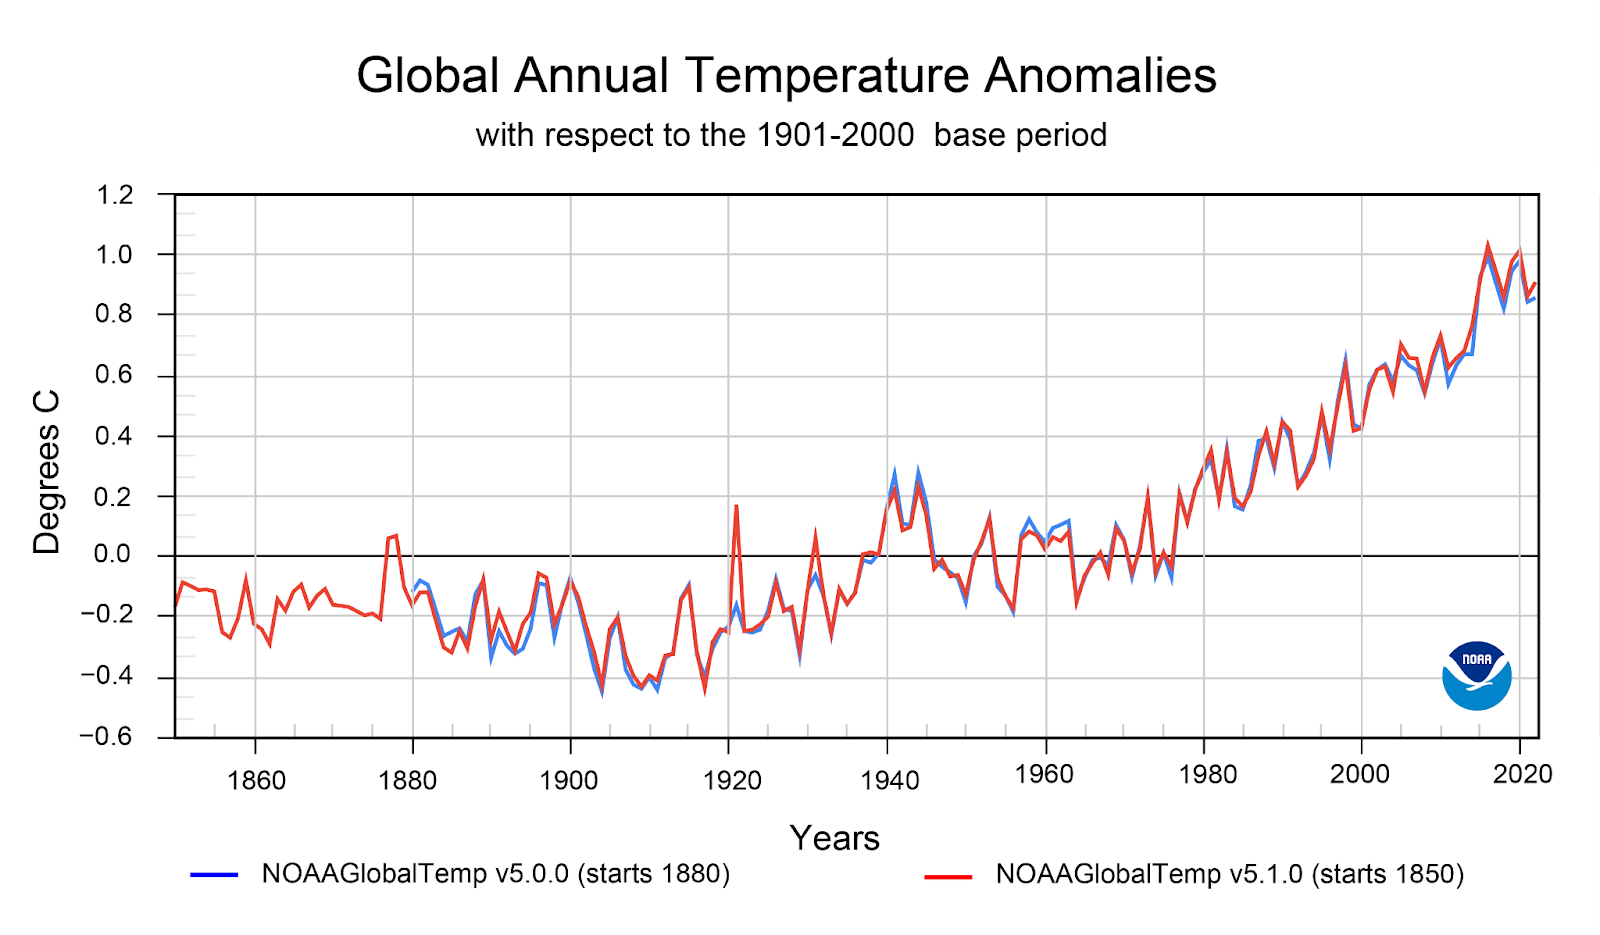

If you'd like more information about how to calculate anomalies, see our [Anomalies](https://github.com/climate-datalab/Getting-Started-Tutorials/blob/main/6.%20Anomalies.ipynb) tutorial!

<a id='import'></a> 
## **Download + Import Needed Packages**

You will need the `xarray` and `matplotlib` packages in your Python environment in order to complete this tutorial. If these have not already been installed, you can use the following commands in your __Terminal__ (Mac) or __Windows Command Prompt__ (Windows) to install them:

`conda install xarray`

`conda install matplotlib`

Great! The needed packages for our time series graph are now installed in the terminal. To make them accessible to Python, let's quickly import them:

In [212]:
import xarray as xr
import matplotlib.pyplot as plt

What are we installing and importing exactly?
- [xarray](https://docs.xarray.dev/en/latest/getting-started-guide/why-xarray.html) can read and write NetCDF files. For us this will open our netCDF file as an xarray object, which we can then easily manipulate.
- [matplotlib](https://matplotlib.org/) is a plotting library that will be used to plot maps and geospatial data

<a id='import'></a> 
## **Locate the Downloaded Climate File**

Now we need to tell Python where to find the file containing climate information. This is done by specifying the file _path_, the directory where the file is located, in addition to the name of the file. You can find the path either using the Finder (Mac) or Windows Explorer, or use a quick hack:

- To find the file path name grab the downloaded file out of your finder/desktop and drag it into your terminal!
-  The terminal will spit out the name of where to find the file
-  Now Copy and paste the location of that file.
- For me it is `/Users/fletcherhoz/Desktop/tas_Amon_BCC-CSM2-MR_amip-future4K_r1i1p1f1_gn_197901-201412.nc`

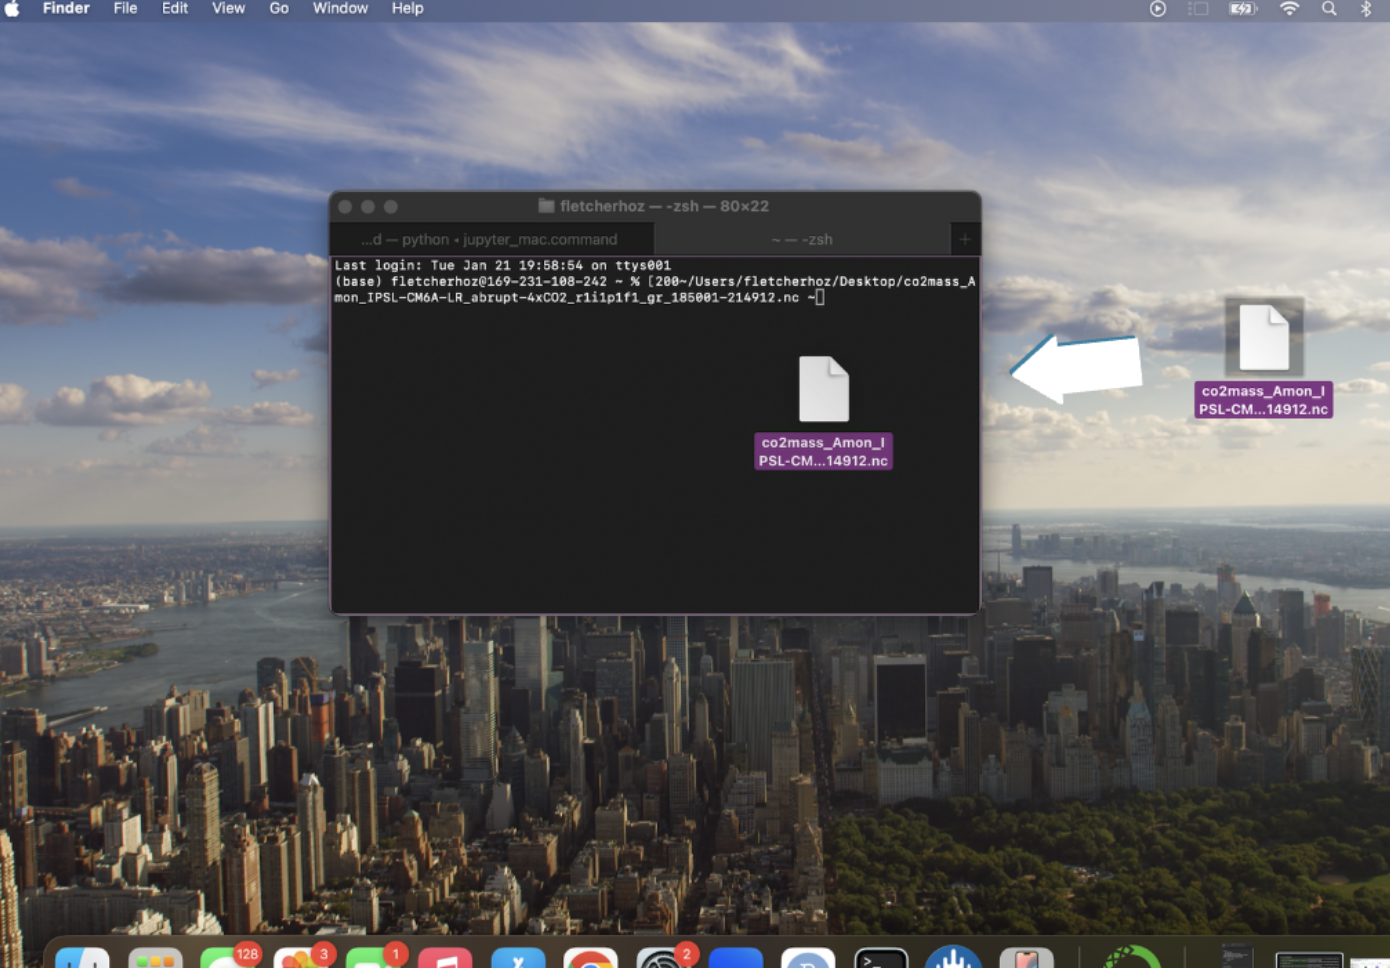

<a id='open'></a> 
## **Open the NetCDF File**

Once you've found the file path, the next step is to use the imported package Xarray to open the data set. We’ll use the `open_dataset()` function from xarray to open the NetCDF file. This will be referred to using the syntax `xr.open_dataset()`, where `xr` is the "alias" you gave the xarray package when it was imported.

All you need to do is to copy the terminal code that revealed the location of the file in your computer and paste it into the `xr.open_dataset()` function. This function then reads the file and loads it into an xarray.Dataset object which allows for easy manipulation and analysis of the data.

In [228]:
data = xr.open_dataset('/Users/fletcherhoz/Desktop/tas_Amon_BCC-CSM2-MR_amip-future4K_r1i1p1f1_gn_197901-201412.nc')

<a id='print'></a> 
## **Print and Analyze the Data**

It's good practice after reading information from a data file into xarray, to u se the `print` function to take a quick look at what's inside. Here, the block of code above has resulted in an xarray object called `data` - but what's in there??


 __We print the dataset because it...__
- Provides a clear picture of what the data looks like and what we have to work with
- Allows us to verify that the necessary variables (e.g, `tas` for near-air surface temperature) are present in the dataset
- Gives an indication of whether the dataset covers the required time range and geographical region that we may need if we were to plot or analyze the data

 __We print the dataset because it...__
- Provides a clear picture of what the data looks like and what we have to work with
- Allows us to verify that the necessary variables (e.g, `tas` for near-air surface temperature) are present in the dataset
- Gives an indication of whether the dataset covers the required time range and geographical region that we may need if we were to plot or analyze the data

In [232]:
print(data)

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) object 1979-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CFMIP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                The experiment, where SSTs are subject to a compo...
    ...                     ...
    title:                  BCC-CSM2-MR output prepared for CMIP6
    tracking_id:            hdl:21.14100/7102d807-f36f-4590-ab96

For creating plots, graphs or any data manipulation we need to know the details associated with the climate data. 

__Let's detail exactly what is in our data...__
 _This information will differ given the data set you use! Dont worry if your data looks different_

 __Dimensions:__
- __lat: 160__ This indicates there are 160 latitude points.
- __lon: 320__ This signifies there are 320 longitude points.
- __time: 432__ This represents 432 time steps. The temporal resolution of this particular dataset happens to be monthly; so each time step here is equal to one month.
- __bnds: 2__ This is an additional dimension used for bounds.

__Coordinates:__

 __Latitude (lat):__ float64
- Values range from approximately -89.14° to 89.14°, covering almost the entire latitude span of the Earth.
  
__Longitude (lon):__ float64 
- Values range from 0.0° to 358.9°, nearly covering the entire globe.
  
__Height (Height):__ float64 
- This value is representing the elevation of the air surface temperature data

 __Time (time):__ object 
- Time points are spaced one day apart

_These coordinates cover the entire planet. That is common for CMIP6 files, so you can choose any location desired._

 __Data Variables:__
-  __time_bnds:__ Shows when each time point starts and ends. This helps to understand the time periods covered.
-  __lat_bnds:__ Shows the latitude bounds. Can be sliced to pick a specific region
-  __lon_bnds__ Shows the longitude bounds. Can be sliced to pick a specific region
- __tas:__ Stores temperature values for each combination of time, latitude, and longitude.

There is more information provided; however, it is not necessary for most data manipulation!


<a id='time'></a> 
## **Convert to DateTime**
We will use the package `Matplotlib` for plotting our time series graph which only works when the time is in `DateTime64` format. We also use `Matplotlib` for various plots in the future so this time conversion is cruical for plotting climate data.

To make sure our climate data is in the right time format for plotting we will print `data.time` to see what the format is. 

In [185]:
print(data.time)

<xarray.DataArray 'time' (time: 432)>
array([cftime.DatetimeNoLeap(1979, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1979, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1979, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1979-01-16 12:00:00 ... 2014-12-16 12:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


As we can see, unfortunately our time is in ` cftime.DatetimeNoLeap` format which will not work when we make the plot in the next two steps. 

However this is an easy fix and just converting the time using `.astype` to `datetime64` will be a simple function shown below.

In [187]:
time = data.time.astype('datetime64[ns]')
print(time)

<xarray.DataArray 'time' (time: 432)>
array(['1979-01-16T12:00:00.000000000', '1979-02-15T00:00:00.000000000',
       '1979-03-16T12:00:00.000000000', '1979-04-16T00:00:00.000000000',
       '1979-05-16T12:00:00.000000000', '1979-06-16T00:00:00.000000000',
       '1979-07-16T12:00:00.000000000', '1979-08-16T12:00:00.000000000',
       '1979-09-16T00:00:00.000000000', '1979-10-16T12:00:00.000000000',
       '1979-11-16T00:00:00.000000000', '1979-12-16T12:00:00.000000000',
       '1980-01-16T12:00:00.000000000', '1980-02-15T00:00:00.000000000',
       '1980-03-16T12:00:00.000000000', '1980-04-16T00:00:00.000000000',
       '1980-05-16T12:00:00.000000000', '1980-06-16T00:00:00.000000000',
       '1980-07-16T12:00:00.000000000', '1980-08-16T12:00:00.000000000',
       '1980-09-16T00:00:00.000000000', '1980-10-16T12:00:00.000000000',
       '1980-11-16T00:00:00.000000000', '1980-12-16T12:00:00.000000000',
       '1981-01-16T12:00:00.000000000', '1981-02-15T00:00:00.000000000',
       '1981-

As we can see now the newly corrected varible `time` is in the correct time format of `dtype='datetime64[ns]` 

We can now use this to plot our time! 

<a id='variable'></a> 
## **Call out the Desired Variable**
The dataset contains near-surface air temperature data (`tas`) recorded at different latitudes, longitudes, and times. We need to average all of the coordinate pounts over in the climate data so we can make one time series plot the global temperature over time. 

For more information about all of the CMIP climate data varible short codes visit [here](https://pcmdi.llnl.gov/mips/cmip3/variableList.html) and scroll down a little.

In [190]:
temp_data = data.tas.mean(dim=["lat", "lon"])

- `data.tas` calls out the air surface temperature varible seen in our net cdf file that we labeled data above
- `.mean(dim=['lat', 'lon'])`Averages the temperature data over all the latitude and longitude points in the region defined by the net cdf file
- The result is a single average temperature value for each time step, rather than multiple values for different locations.
- Now it is plot-able format!

<a id='Plot'></a>  
## **Plot!**  
- Here we will plot a time series of the air surface temperature for our climate data, which spans the entire world from 1979 to 2014.

A) Set Up the Plot:
- Start by creating a figure and axis using `plt.subplots()`.
- This function creates a figure (`fig`) and a set of subplots (`ax`).
- The figure is the overall window or page that contains the plot, while the axes are the actual plotting areas where the data will be visualized.
- `figsize=(20, 8)` specifies the size of the figure in inches, setting up the space where your data will be plotted.


B) Plot the Surface Air Temperatures:
- The following code creates a time series plot.
- `ax.plot()`: This function plots the data on the specified axes, creating a line graph by connecting data points with straight lines.
- `time`: This represents the data for the x-axis, showing the years from 1979 to 2014.
- `time_series`: This represents the data for the y-axis, showing the surface air temperature in Kelvin for the time period.
- `label='Near-Surface Air Temperature'`: The label argument is used for the legend, identifying what this line represents.
- `color='b'`: This sets the color of the line to blue.

C) Add Labels, Title, and Legend:
- Use `ax.set_title()`, `ax.set_xlabel()`, and `ax.set_ylabel()` to add a title and labels to your plot, making it more informative.
- Finally, `ax.legend()` adds a legend to differentiate between the plotted lines.


D) Show the Plot!
- The last step! `plt.show()` renders the plot, opening a window (or displaying inline, depending on your environment) to show the final visualization.

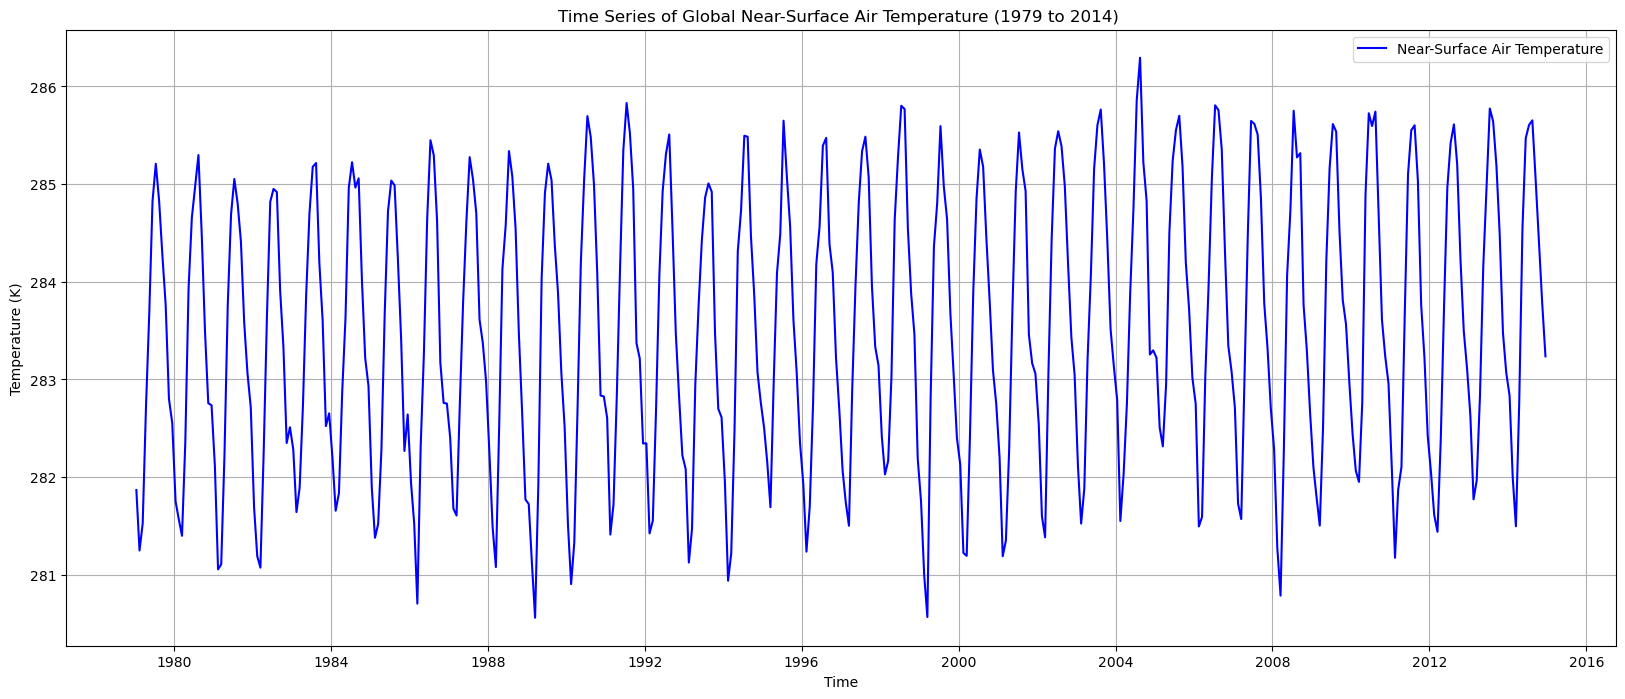

In [196]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, temp_data, label='Near-Surface Air Temperature', color='b')
ax.set_title("Time Series of Global Near-Surface Air Temperature (1979 to 2014) ")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (K)")
ax.legend()
ax.grid()
plt.show()

Great job! We now have our time series plot of the Global 

## **NOTE**

__Do not use this data for publication yet because grid cells are not weighted by area, which could lead to misleading regional averages.__

We will dive deeper in later tutorials on how to weigh the grid cells by area. Right now we are focusing on the basics. However it is important to do so because it willa allow our plot to have...

Accurate Averages: Weighting grid cells by their area ensures that regional average climate plots accurately reflect the true climate of the region.

True Representation: Each grid cell’s area impacts regional climate averages. Without weighting, your plots might misrepresent the climate conditions.

Avoid Misleading Data: It can lead to inaccurate regional averages. Proper weighting ensures your climate data is represented correctly.